### Machine Learning for Finance - Classification
#### Forecasting Credit Card Default



## Dataset description

- **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- **X2**: Gender (1 = male; 2 = female). 
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- **X4**: Marital status (1 = married; 2 = single; 3 = others). 
- **X5**: Age (year). 
- **X6** - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- **Y**: Indication if the customer defaulted in the following month (0-no, 1-yes).

## Work description

Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the insurance company reaching its objectives.</p>

Crisp-DM: Business understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective,
then converting this knowledge into a data mining problem definition and a preliminary plan designed to achieve
the objectives

### Overview
Develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model to decrease operational losses.

## Initializations and data loading

Crisp-DM: Data understanding
The data understanding phase starts with initial data collection and proceeds with activities that enable you to
become familiar with the data, identify data quality problems, discover first insights into the data, and / or detect
interesting subsets to form hypotheses regarding hidden information.

The XB group decided to delete the first row from the excel. That will set the columns with the appropriate labels.


In [216]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import csv
import category_encoders as ce
import collections
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve


In [217]:
!pip3 install openpyxl

In [218]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_excel('default_credit_card_clients.xlsx',engine='openpyxl', index_col="ID")
ds.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [219]:
ds.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [220]:
# Show top rows
ds.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [221]:
ds.describe(include='all')


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [222]:
# Search for duplication entries
ds.duplicated().any()


True

In [223]:
# Search for missing values
ds.isnull().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [224]:
ds.rename(columns={'default payment next month':'default'},inplace=True)

In [225]:
ds.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [226]:
# Arrange the data to better view:
fil = (ds['EDUCATION'] == 5) | (
    ds['EDUCATION'] == 6) | (ds['EDUCATION'] == 0)
ds.loc[fil, 'EDUCATION'] = 4
ds['EDUCATION'].value_counts()
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [227]:
ds.loc[ds['MARRIAGE'] == 0, 'MARRIAGE'] = 3
ds['MARRIAGE'].value_counts()
# Marital status(1=married, 2=single, 3=others)


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [228]:
ds.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
for i in range(1, 7):
    col = 'PAY_'+str(i)
    ds[col] = ds[col].apply(lambda x: 0 if x < 1 else x)

ds['PAY_1'].value_counts()
# 0=pay duly, 1=payment delay for one month, 2=payment delay for two months


0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [229]:
ds.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [230]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(6,4)

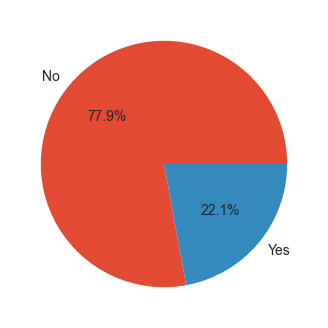

In [231]:
inter=ds['default'].value_counts()
plt.pie(inter,labels=['No','Yes'],autopct='%0.1f%%',radius=1);
# There is a balance issue in the class distribution: 78% No and 22% Yes.

In [232]:
numeric_col = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
               'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
               'PAY_AMT5', 'PAY_AMT6']


array([[<AxesSubplot: title={'center': 'LIMIT_BAL'}>,
        <AxesSubplot: title={'center': 'SEX'}>,
        <AxesSubplot: title={'center': 'EDUCATION'}>,
        <AxesSubplot: title={'center': 'MARRIAGE'}>,
        <AxesSubplot: title={'center': 'AGE'}>],
       [<AxesSubplot: title={'center': 'PAY_1'}>,
        <AxesSubplot: title={'center': 'PAY_2'}>,
        <AxesSubplot: title={'center': 'PAY_3'}>,
        <AxesSubplot: title={'center': 'PAY_4'}>,
        <AxesSubplot: title={'center': 'PAY_5'}>],
       [<AxesSubplot: title={'center': 'PAY_6'}>,
        <AxesSubplot: title={'center': 'BILL_AMT1'}>,
        <AxesSubplot: title={'center': 'BILL_AMT2'}>,
        <AxesSubplot: title={'center': 'BILL_AMT3'}>,
        <AxesSubplot: title={'center': 'BILL_AMT4'}>],
       [<AxesSubplot: title={'center': 'BILL_AMT5'}>,
        <AxesSubplot: title={'center': 'BILL_AMT6'}>,
        <AxesSubplot: title={'center': 'PAY_AMT1'}>,
        <AxesSubplot: title={'center': 'PAY_AMT2'}>,
        <A

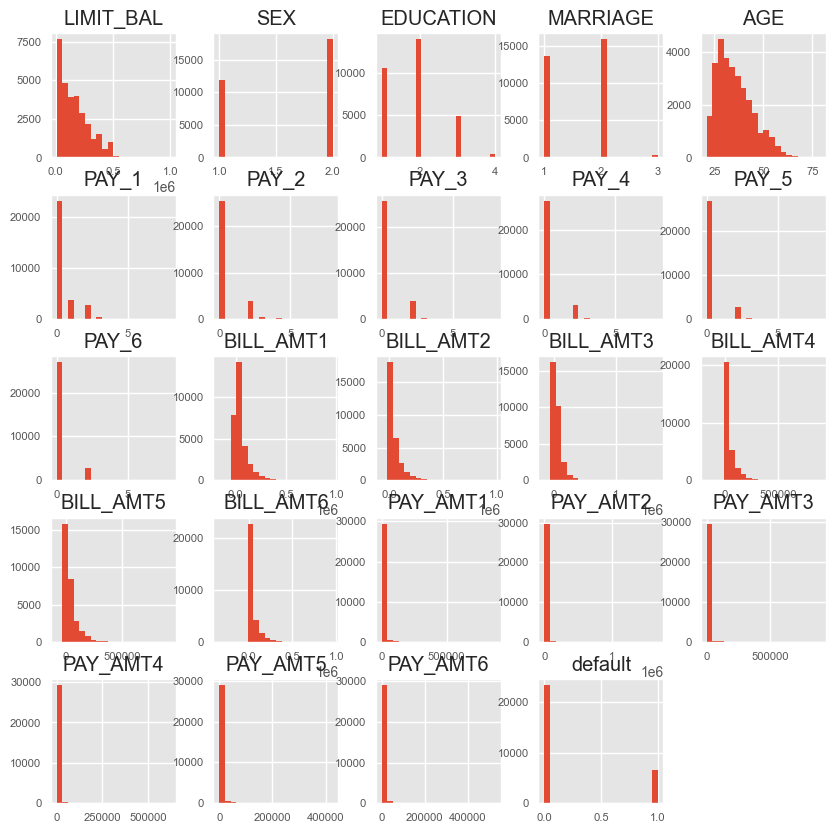

In [233]:
# Do histograms on all numeric variables to identify patterns
# Age is showing a distribution pattern.
numerical = ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=20, figsize=(10, 10), layout=(5, 5),
                        xlabelsize=8, ylabelsize=8)


In [234]:
def num_plot(col):
    
    plt.subplot(1,2,1)
    sns.histplot(x=col,hue=ds['default']);
    
    plt.subplot(1,2,2)
    sns.boxplot(y=col,x=ds['default']);

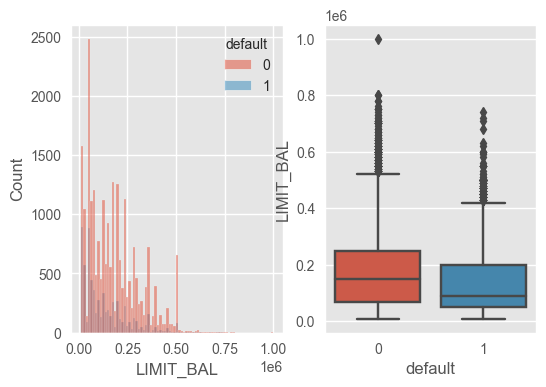

In [235]:
num_plot(ds['LIMIT_BAL'])


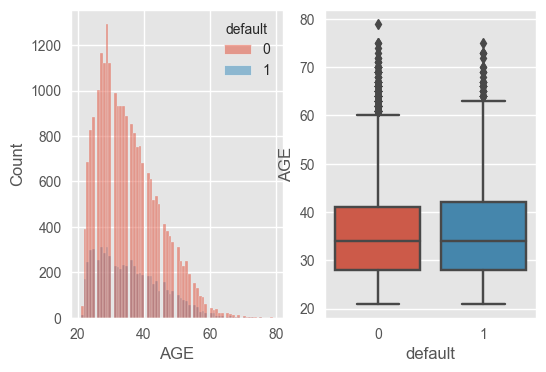

In [236]:
num_plot(ds['AGE'])
# Age can be bined in bin size of 5 as can be seen from distribution plot


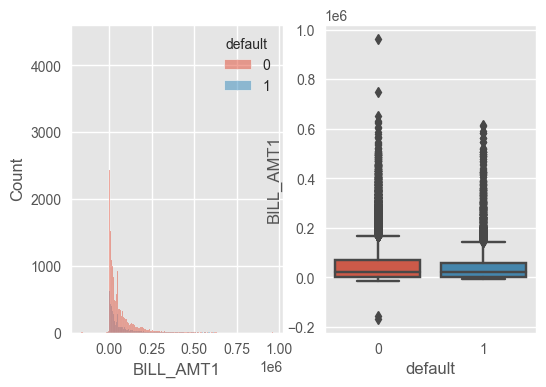

In [237]:
num_plot(ds['BILL_AMT1'])
# Amount of bill statement follows similar pattern for others months


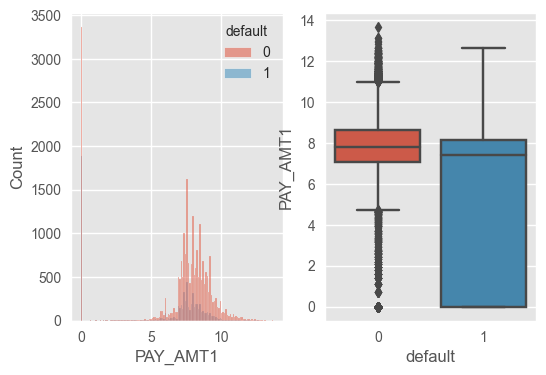

In [238]:
num_plot(np.log1p(ds['PAY_AMT1']))
# Amount of previous payment follows similar pattern for other months


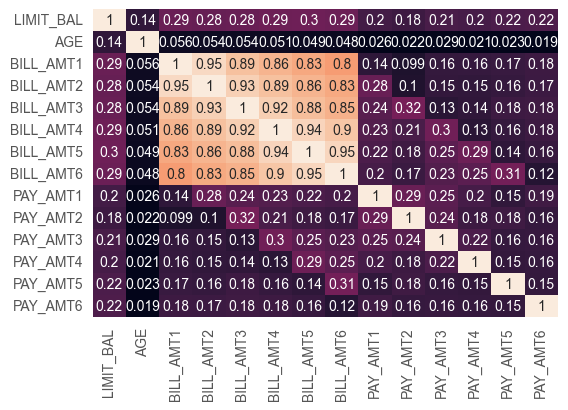

In [239]:
sns.heatmap(ds[numeric_col].corr(),cbar=False,annot=True);
# Bill Amount shows >80% correlation from the previous months. Group XB decided to mantain only BILL_AMT1 (more recent).


In [240]:
categorical_col = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
                   'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [241]:
def cat_plot(col):
    
    inter=ds.groupby(col)['default'].mean()
    
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=ds,order=inter.index);
    
    plt.subplot(1,2,2)
    plt.pie(inter,labels=inter.index,autopct='%0.1f%%',radius=1.2);

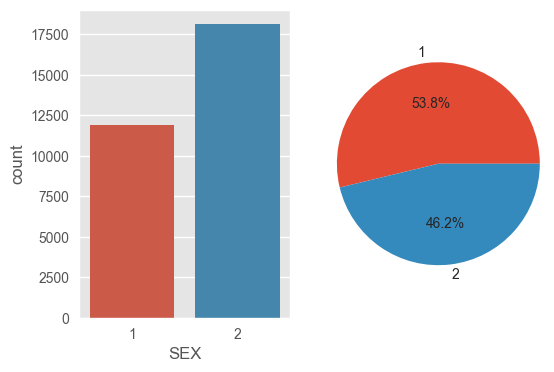

In [242]:
cat_plot('SEX')
# Males have a higher chance on defaulting on credit card bills then female


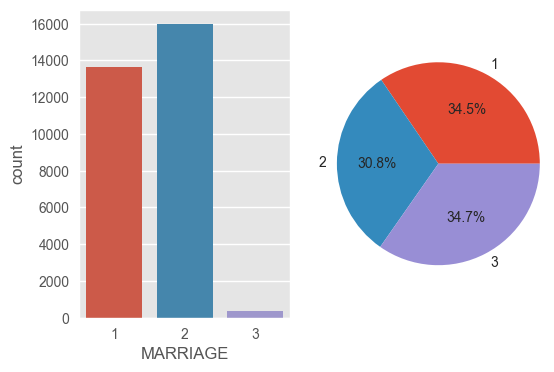

In [243]:
cat_plot('MARRIAGE')
# Single person have lower chances of defaulting.


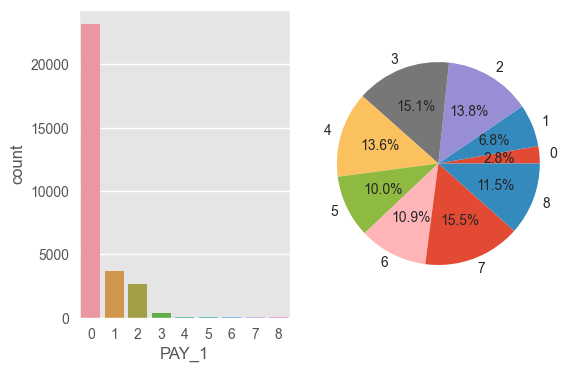

In [244]:
cat_plot('PAY_1')
# As the repayment status get delayed by 1 month, the chances of defaulting increases significantly.


# Data Preparation
Crisp-DM: The data preparation phase covers all activities needed to construct the final dataset[data that will be fed into the
                                                                                                 modeling tool(s)] from the initial raw data. Data preparation tasks are likely to be performed multiple times and not
in any prescribed order. Tasks include table, record, and attribute selection, as well as transformation and cleaning
of data for modeling tools.

The XB group decide to load the data again specially fot the data preparation. This can be a good tip to avoid noisy from the data understanding process.
The missing values checked was 100 % ok.
For the outliers the group decide to use the information from Data Understanding.

The categorical data will be converted to dummy variables.
The data will be normalized for the modeling process.
# Come back with the original Data (ds_raw)


In [245]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_excel('default_credit_card_clients.xlsx', engine='openpyxl', index_col='ID')
ds.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [246]:
# Optimize education feature
fil = (ds['EDUCATION'] == 5) | (
    ds['EDUCATION'] == 6) | (ds['EDUCATION'] == 0)
ds.loc[fil, 'EDUCATION'] = 4
ds['EDUCATION'].value_counts()
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [247]:
# Optimize Marriage Feature
ds.loc[ds['MARRIAGE'] == 0, 'MARRIAGE'] = 3
ds['MARRIAGE'].value_counts()
# Marital status(1=married, 2=single, 3=others)


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [248]:
# Optimize Pay feature
ds.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
for i in range(1, 7):
    col = 'PAY_'+str(i)
    ds[col] = ds[col].apply(lambda x: 0 if x < 1 else x)

ds['PAY_1'].value_counts()
# 0=pay duly, 1=payment delay for one month, 2=payment delay for two months


0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [249]:
# Set the types for the features

#ds['AGE']=pd.cut(ds['AGE'],bins=range(20,85,5),labels=range(len(range(20,85,5))-1))
numeric_col = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
               'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
               'PAY_AMT5', 'PAY_AMT6']

In [250]:
# Transform a list of columns to categorical
cols = ['SEX', 'AGE', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
ds[cols] = ds[cols].apply(lambda x:x.astype('category'))

In [251]:
# Bin the Age
# Create bins interval based on distribution/quartiles
ds['AGE']
binsInterval = [20, 28, 34, 41, 79]
intervalLabels = ['(20, 28]', '(28, 34]',  '(34, 41]', '(41, 79]']
ds['AGE'] = pd.cut(
    ds['AGE'], bins=binsInterval, labels=intervalLabels)


In [252]:
ds.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,"(20, 28]",2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,"(20, 28]",0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,"(28, 34]",0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,"(34, 41]",0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,"(41, 79]",0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [253]:
# Ckeck the top counts of all categorical variables
categorical=ds.select_dtypes(exclude=["number","bool_","object_"]).columns.tolist()
categorical
for var in ds[categorical]:
    print(var,":\n",ds[var].value_counts(), sep="")

SEX:
2    18112
1    11888
Name: SEX, dtype: int64
EDUCATION:
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
MARRIAGE:
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64
AGE:
(20, 28]    8013
(28, 34]    7683
(41, 79]    7450
(34, 41]    6854
Name: AGE, dtype: int64
PAY_1:
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64
PAY_2:
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64
PAY_3:
0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64
PAY_4:
0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: PAY_4, dtype: int64
PAY_5:
0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64
PAY_6:
0    26921
2     2766
3      184
4     

In [254]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)


In [255]:
# Encode boolean features into dummy variables
cols = ['SEX']
X = pd.get_dummies(data=X,columns=cols,drop_first=True)

In [256]:
import numpy as np
import pandas as pd              # version 0.23.4
import category_encoders as ce   # version 1.2.8
from sklearn.preprocessing import LabelEncoder


In [257]:
# Encode categorical values into dummy
# Encode categorical values into dummy variables
cols = ['AGE']
ce_one_hot = ce.OneHotEncoder(cols=cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)


In [258]:
X.head()


,LIMIT_BAL,EDUCATION,MARRIAGE,"AGE_(20, 28]","AGE_(28, 34]","AGE_(34, 41]","AGE_(41, 79]",PAY_1,PAY_2,PAY_3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_2
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,1,1,0,0,0,2,2,0,...,0,0,0,689,0,0,0,0,1,1
2,120000,2,2,1,0,0,0,0,2,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
3,90000,2,2,0,1,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
4,50000,2,1,0,0,1,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,1
5,50000,2,1,0,0,0,1,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


In [259]:
X.shape

(30000, 27)

### Modeling
Crisp-DM: In this phase, various modeling techniques are selected and applied, and their parameters are calibrated to optimal
values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific
requirements on the form of data. Therefore, going back to the data preparation phase is often necessary.

The XG Group decide to use the following models: Logistic Regression, SVM, KNN, Neural Network, Gaussian NB and Decision Trees.

In [260]:
# Remove columns that should not be used as it may leak result
# Remove BILL_AMT due to the high correlation with BILL_AMT1
cols = ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
X.drop(columns=cols, inplace=True)


In [261]:
# Create the Target
y = X['default payment next month']


In [262]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=123)


In [263]:
# Remove the Target from the dataset
X = X.drop(['default payment next month'], axis=1)
X_train = X_train.drop(['default payment next month'], axis=1)
X_test = X_test.drop(['default payment next month'],axis=1)

In [264]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
#tempDF.drop(columns='default payment next month', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [265]:
X_train_scaled


array([[1.91919192e-01, 3.33333333e-01, 0.00000000e+00, ...,
        9.40615996e-03, 5.69735901e-03, 1.00000000e+00],
       [1.41414141e-01, 6.66666667e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92929293e-01, 1.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 5.46658949e-04, 1.00000000e+00],
       ...,
       [1.11111111e-01, 6.66666667e-01, 0.00000000e+00, ...,
        4.27403529e-03, 3.44830195e-03, 1.00000000e+00],
       [2.22222222e-01, 0.00000000e+00, 0.00000000e+00, ...,
        7.03351941e-03, 2.36822493e-03, 1.00000000e+00],
       [4.94949495e-01, 3.33333333e-01, 5.00000000e-01, ...,
        2.76651763e-04, 3.11538854e-03, 1.00000000e+00]])

In [266]:
# Create object and train the model
classModelreg = LogisticRegression(random_state=123, max_iter=200)
classModelreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200, random_state=123)

In [267]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE', 'AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                   metricsObj.precision_score(yTrain, yPredTrain),
                   metricsObj.recall_score(yTrain, yPredTrain),
                   metricsObj.f1_score(yTrain, yPredTrain),
                   metricsObj.roc_auc_score(yTrain, yPredTrain)
                   ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
                  metricsObj.precision_score(yTest, yPredTest),
                  metricsObj.recall_score(yTest, yPredTest),
                  metricsObj.f1_score(yTest, yPredTest),
                  metricsObj.roc_auc_score(yTest, yPredTest)
                  ]
  resultsDF = pd.DataFrame(
      {'Measure': measures_list, 'Train': train_results, 'Test': test_results})
  return (resultsDF)


In [268]:
# predict y for X_train and X_test
y_pred_train = classModelreg.predict(X_train_scaled)
y_pred_test = classModelreg.predict(X_test_scaled)


In [269]:
#Function to plot confusion matrix - Adapted from https: // github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(
            value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(
        group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap,
                     cbar=cbar, xticklabels=categories, yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)


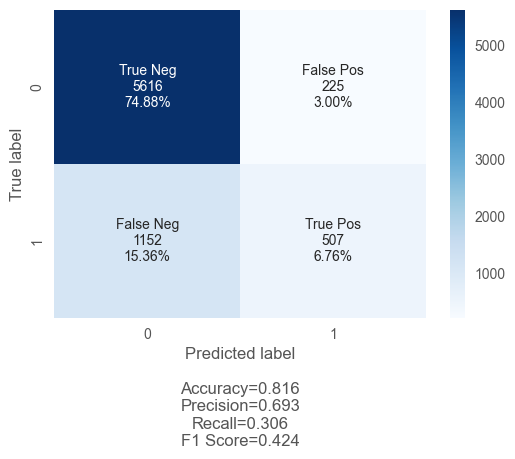

In [270]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred_test)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['0', '1']
make_confusion_matrix(cf,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


In [271]:
resultsDF = performanceMetricsDF(
    metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF


,Measure,Train,Test
0,ACCURACY,0.816133,0.816400
1,PRECISION,0.684859,0.692623
2,RECALL,0.312638,0.305606
3,F1 SCORE,0.429301,0.424090
4,AUC,0.635889,0.633542


### Modeling and evaluating - with oversampling to remove the imbalance


Counter({0: 17523, 1: 4977})


<AxesSubplot: xlabel='y', ylabel='count'>

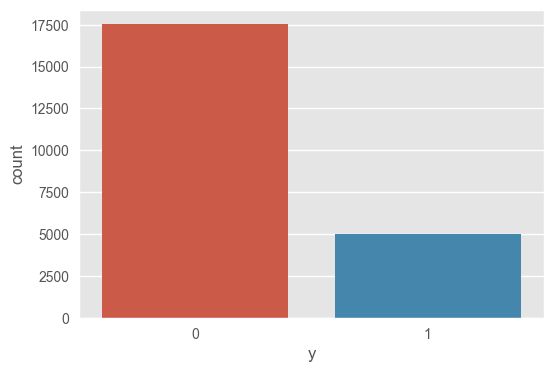

In [272]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train}), ax=ax)

Counter({0: 17523, 1: 8761})


<AxesSubplot: xlabel='y', ylabel='count'>

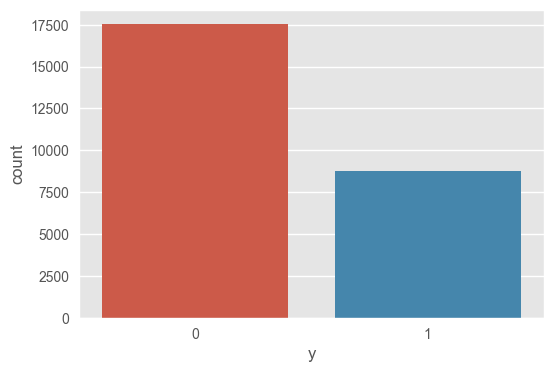

In [273]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=0.5)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train2}), ax=ax)

In [274]:
# Train de model
classModelreg.fit(X_train_scaled2, y_train2)

# Predict values
# predict y for X_train and X_test
y_pred_train = classModelreg.predict(X_train_scaled2)
y_pred_test = classModelreg.predict(X_test_scaled)

# Show performance results
resultsDF = performanceMetricsDF(
    metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF


,Measure,Train,Test
0,ACCURACY,0.758751,0.819067
1,PRECISION,0.744050,0.636775
2,RECALL,0.421071,0.423749
3,F1 SCORE,0.537794,0.508867
4,AUC,0.674326,0.677548


### Modeling and evaluating - with undersampling to remove the imbalance


Counter({0: 4977, 1: 4977})


<AxesSubplot: xlabel='y', ylabel='count'>

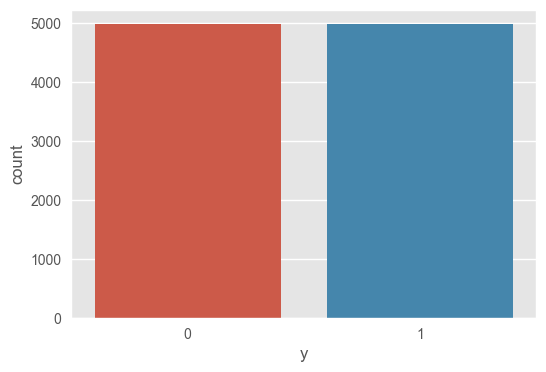

In [275]:
# Subset by class
ss_class_0 = pd.DataFrame(data=X_train_scaled[y_train == 0], index=X_train[y_train == 0].index)
ss_class_1 = pd.DataFrame(data=X_train_scaled[y_train == 1], index=X_train[y_train == 1].index)

# Do random under-sampling (the same 0's as the existing 1's)
count_class_0, count_class_1 = y_train.value_counts()
ss_class_0_under = ss_class_0.sample(count_class_1, replace=False)
X_train_scaled3 = pd.concat([ss_class_0_under, ss_class_1], axis=0)
y_train3 = y_train[X_train_scaled3.index]

# Present results
print(collections.Counter(y_train3))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train3}), ax=ax)

In [276]:
# Train de model
classModelreg.fit(X_train_scaled3, y_train3)

# Predict values
# predict y for X_train and X_test
y_pred_train = classModelreg.predict(X_train_scaled3)
y_pred_test = classModelreg.predict(X_test_scaled)

# Show performance results
resultsDF = performanceMetricsDF(
    metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF


,Measure,Train,Test
0,ACCURACY,0.696303,0.785067
1,PRECISION,0.772448,0.512863
2,RECALL,0.556560,0.564798
3,F1 SCORE,0.646970,0.537579
4,AUC,0.696303,0.706213


In [277]:
# Check AUC
FP, TP, thresholds = metrics.roc_curve(
    y_test, classModelreg.decision_function(X_test_scaled))
print("AUC:{}".format(metrics.auc(FP, TP)))  # AUC of ROC


AUC:0.7582573211193678


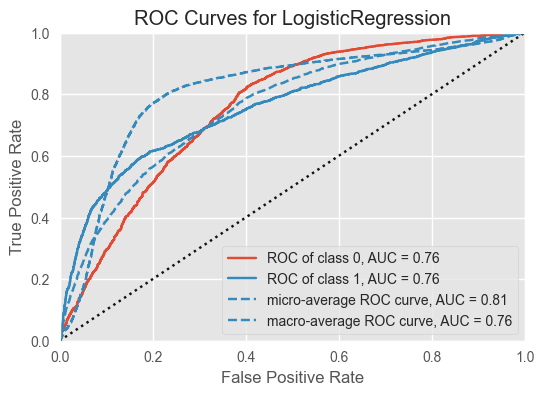

<AxesSubplot: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [278]:
# ROC curve
visualizer = ROCAUC(classModelreg, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


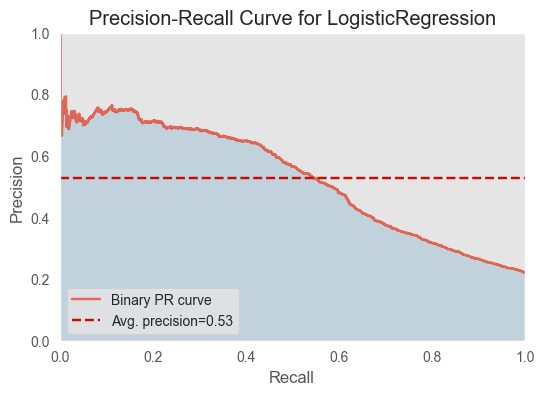

<AxesSubplot: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [279]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModelreg, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


In [280]:
# Show 10 top features coefficients
abs_coef = np.concatenate(np.abs(classModelreg.coef_))
sorted_index = np.argsort(abs_coef)[::-1]  # sort indices
top_10 = sorted_index[:10]
top_10DF = pd.DataFrame(data={'feature': list(
    X_train.columns[top_10]), 'coef': abs_coef[top_10]})
top_10DF


,feature,coef
0,PAY_1,6.231458
1,PAY_AMT1,1.967649
2,PAY_3,1.603622
3,PAY_AMT2,1.522539
4,LIMIT_BAL,1.448768
5,PAY_6,1.099713
6,PAY_2,1.003371
7,PAY_AMT5,0.998008
8,PAY_4,0.964840
9,PAY_AMT4,0.857368


### Modeling - SVM


In [281]:
from sklearn import svm


In [282]:
# Create object and train the model
classModelsvm = svm.SVC(gamma='scale', random_state=123, probability=True)
classModelsvm.fit(X_train_scaled3, y_train3)


SVC(probability=True, random_state=123)

In [283]:
# predict y for X_train and X_test
y_pred_train = classModelsvm.predict(X_train_scaled3)
y_pred_test = classModelsvm.predict(X_test_scaled)


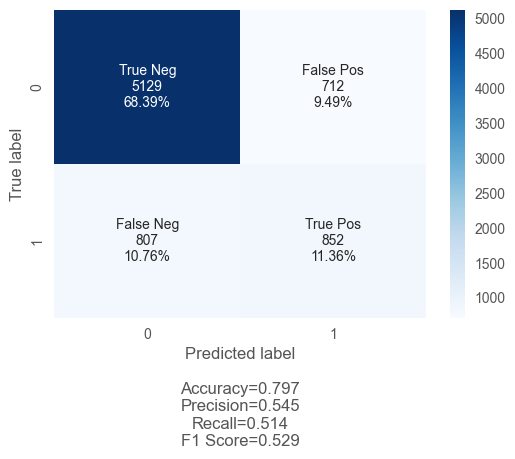

In [284]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred_test)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['0', '1']
make_confusion_matrix(cf,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


In [285]:
# Show performance results
resultsDF = performanceMetricsDF(
    metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF


,Measure,Train,Test
0,ACCURACY,0.695901,0.797467
1,PRECISION,0.804878,0.544757
2,RECALL,0.517179,0.513562
3,F1 SCORE,0.629725,0.528700
4,AUC,0.695901,0.695833


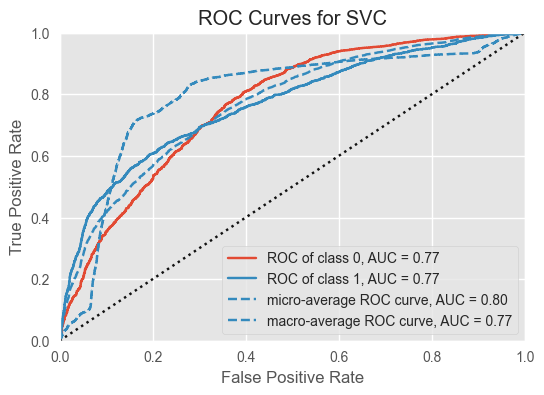

<AxesSubplot: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [286]:
# ROC curve
visualizer = ROCAUC(classModelsvm, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train3)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


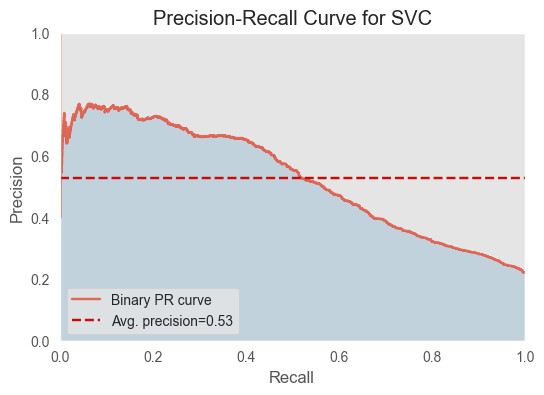

<AxesSubplot: title={'center': 'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [287]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModelsvm, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train3)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


### Modeling - KNN


In [288]:
from sklearn.neighbors import KNeighborsClassifier


In [289]:
# Create object and train the model
classModelknn = KNeighborsClassifier(n_neighbors=5)
# train the model (not training in reality)
classModelknn.fit(X_train_scaled3, y_train3)


KNeighborsClassifier()

In [290]:
# predict y for X_train and X_test
y_pred_train = classModelknn.predict(X_train_scaled3)
y_pred_test = classModelknn.predict(X_test_scaled)


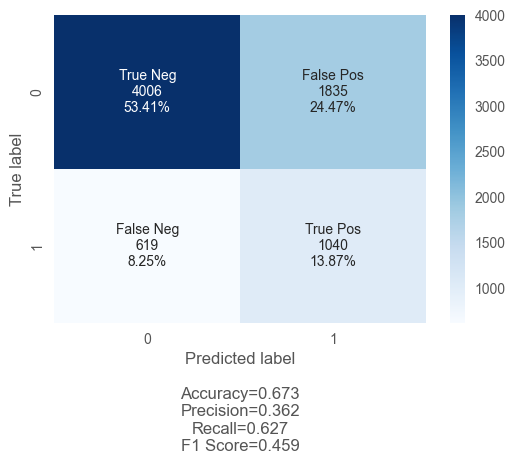

In [291]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred_test)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['0', '1']
make_confusion_matrix(cf,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


In [292]:
# Show performance results
resultsDF = performanceMetricsDF(
    metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF


,Measure,Train,Test
0,ACCURACY,0.758489,0.672800
1,PRECISION,0.769990,0.361739
2,RECALL,0.737191,0.626884
3,F1 SCORE,0.753233,0.458756
4,AUC,0.758489,0.656363


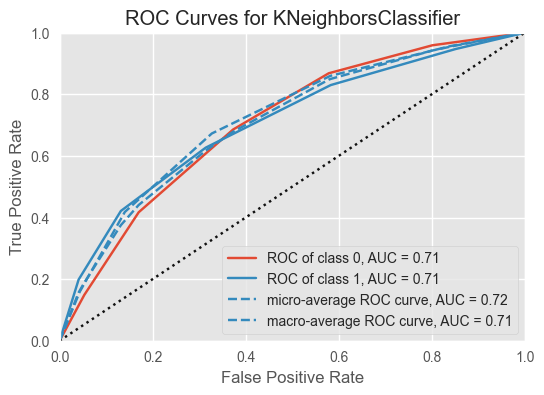

<AxesSubplot: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [293]:
# ROC curve
visualizer = ROCAUC(classModelknn, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train3)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


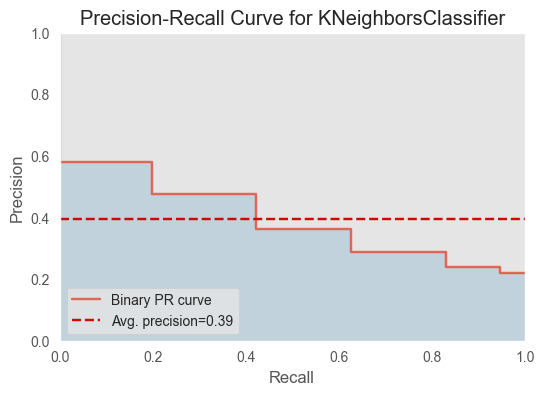

<AxesSubplot: title={'center': 'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [294]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModelknn, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train3)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


### MODELING NN

In [295]:
from sklearn.neural_network import MLPClassifier


In [296]:
# Create object and train the model
classModelnn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                           hidden_layer_sizes=(5, 2), random_state=123, max_iter=500)
classModelnn.fit(X_train_scaled3, y_train3)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=500,
              random_state=123, solver='lbfgs')

In [297]:
# predict y for X_train and X_test
y_pred_train = classModelnn.predict(X_train_scaled3)
y_pred_test = classModelnn.predict(X_test_scaled)


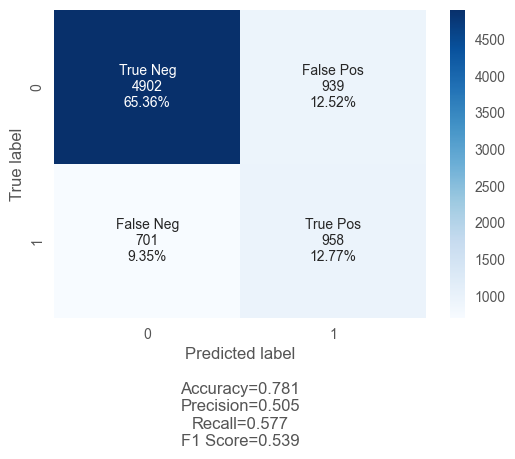

In [298]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred_test)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['0', '1']
make_confusion_matrix(cf,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


In [299]:
resultsDF = performanceMetricsDF(
    metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF


,Measure,Train,Test
0,ACCURACY,0.697609,0.781333
1,PRECISION,0.767328,0.505008
2,RECALL,0.567209,0.577456
3,F1 SCORE,0.652264,0.538808
4,AUC,0.697609,0.708348


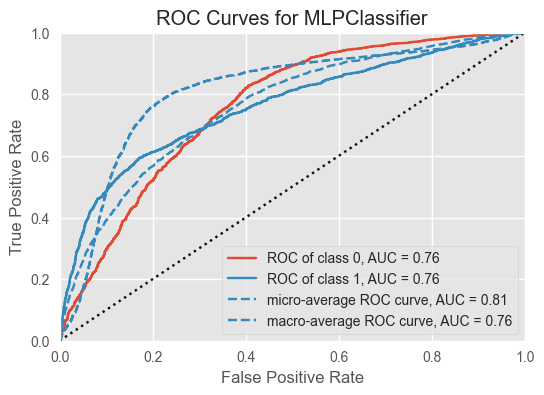

<AxesSubplot: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [300]:
# ROC curve
visualizer = ROCAUC(classModelnn, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train3)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


### MODELING NB


In [301]:
from sklearn.naive_bayes import GaussianNB


In [302]:
# Create object and train the model
classModelnb = GaussianNB()
classModelnb.fit(X_train_scaled3, y_train3)


GaussianNB()

In [303]:
# predict y for X_train and X_test
y_pred_train = classModelnb.predict(X_train_scaled3)
y_pred_test = classModelnb.predict(X_test_scaled)


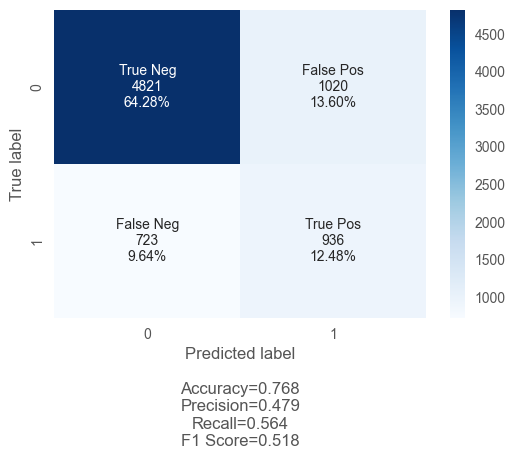

In [304]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred_test)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['0', '1']
make_confusion_matrix(cf,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


In [305]:
resultsDF = performanceMetricsDF(
    metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF


,Measure,Train,Test
0,ACCURACY,0.694997,0.767600
1,PRECISION,0.760257,0.478528
2,RECALL,0.569620,0.564195
3,F1 SCORE,0.651275,0.517842
4,AUC,0.694997,0.694784


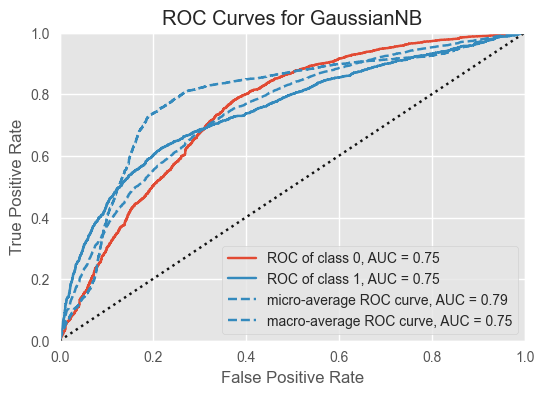

<AxesSubplot: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [306]:
# ROC curve
visualizer = ROCAUC(classModelnb, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train3)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


### MODELING DT


In [307]:
# MODELING DT


In [308]:
from sklearn import tree


In [309]:
# Create object and train the model
classModeldt = tree.DecisionTreeClassifier(max_depth=3, random_state=123)
classModeldt.fit(X_train_scaled3, y_train3)


DecisionTreeClassifier(max_depth=3, random_state=123)

In [310]:
# predict y for X_train and X_test
y_pred_train = classModeldt.predict(X_train_scaled3)
y_pred_test = classModeldt.predict(X_test_scaled)


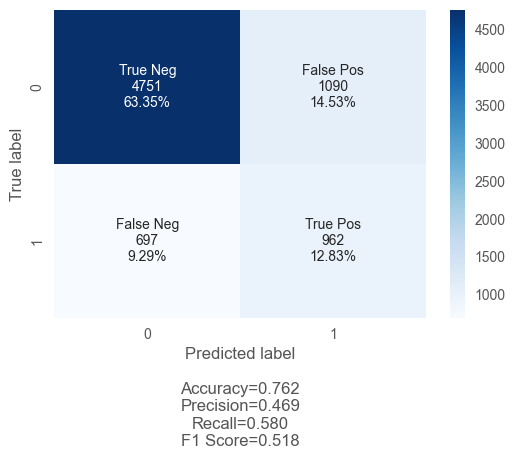

In [311]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred_test)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['0', '1']
make_confusion_matrix(cf,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


In [312]:
resultsDF = performanceMetricsDF(metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF


,Measure,Train,Test
0,ACCURACY,0.695097,0.761733
1,PRECISION,0.753392,0.468811
2,RECALL,0.580068,0.579867
3,F1 SCORE,0.655466,0.518459
4,AUC,0.695097,0.696628


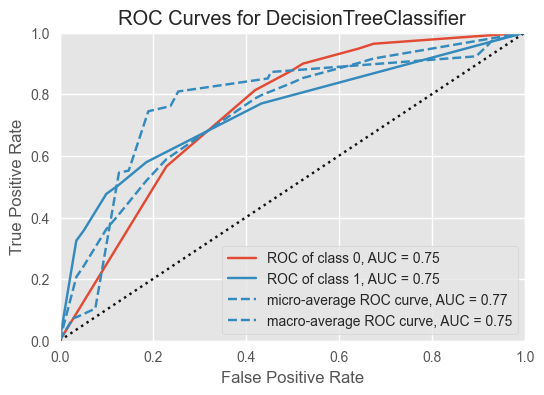

<AxesSubplot: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [313]:
# ROC curve
visualizer = ROCAUC(classModeldt, classes=['0', '1'])
visualizer.fit(X_train_scaled3, y_train3)
visualizer.score(X_test_scaled, y_test)
visualizer.show()


In [314]:
import pickle
file = open("modelclass.pickle", "wb")
pickle.dump(classModelnn, file)
file.close()


# Deployment

Crisp-DM: Depending on the requirements, the
deployment phase can be as simple as generating a report or as complex as implementing a repeatable data mining
process across the enterprise. In many cases, it is the customer, not the data analyst, who carries out the deployment
steps. However, even if the analyst will carry out the deployment effort, it is important for the customer to understand
up front what actions need to be carried out in order to actually make use of the created models.

The group XB decide to deliver a report showing the prediction of Default for next month. The best recomendation is neural network with a good F1 Score and a good Recall compared to the others models. Comparing the classification with the real data it seems that the group have to run the Crisp-DM cycle again to improve the results after approval of the costumer.


In [315]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
import pickle


In [316]:
# Load the trained model
file = open("modelclass.pickle", "rb")
classModelnn = pickle.load(file)
file.close()


In [317]:
X

,LIMIT_BAL,EDUCATION,MARRIAGE,"AGE_(20, 28]","AGE_(28, 34]","AGE_(34, 41]","AGE_(41, 79]",PAY_1,PAY_2,PAY_3,...,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,1,1,0,0,0,2,2,0,...,0,0,3913,0,689,0,0,0,0,1
2,120000,2,2,1,0,0,0,0,2,0,...,0,2,2682,0,1000,1000,1000,0,2000,1
3,90000,2,2,0,1,0,0,0,0,0,...,0,0,29239,1518,1500,1000,1000,1000,5000,1
4,50000,2,1,0,0,1,0,0,0,0,...,0,0,46990,2000,2019,1200,1100,1069,1000,1
5,50000,2,1,0,0,0,1,0,0,0,...,0,0,8617,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3,1,0,0,1,0,0,0,0,...,0,0,188948,8500,20000,5003,3047,5000,1000,0
29997,150000,3,2,0,0,0,1,0,0,0,...,0,0,1683,1837,3526,8998,129,0,0,0
29998,30000,2,2,0,0,1,0,4,3,2,...,0,0,3565,0,0,22000,4200,2000,3100,0


In [318]:
# Run the prediction
y_pred = classModelnn.predict(X)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [319]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [320]:
# Show predictions
ds['default'] = y_pred
ds.tail(10)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,default
ID,,,,,,,,,,,,,,,,,,,,,
29991,140000,1,2,1,"(34, 41]",0,0,0,0,0,...,49675,46121,6000,7000,4228,1505,2000,2000,0,0
29992,210000,1,2,1,"(28, 34]",3,2,2,2,2,...,2500,2500,0,0,0,0,0,0,1,1
29993,10000,1,3,1,"(41, 79]",0,0,0,0,0,...,0,0,2000,0,0,0,0,0,0,0
29994,100000,1,1,2,"(34, 41]",0,0,0,0,0,...,69473,55004,2000,111784,4000,3000,2000,2000,0,0
29995,80000,1,2,2,"(28, 34]",2,2,2,2,2,...,82607,81158,7000,3500,0,7000,0,4000,1,0
29996,220000,1,3,1,"(34, 41]",0,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,0
29997,150000,1,3,2,"(41, 79]",0,0,0,0,0,...,5190,0,1837,3526,8998,129,0,0,0,1
29998,30000,1,2,2,"(34, 41]",4,3,2,0,0,...,20582,19357,0,0,22000,4200,2000,3100,1,1
29999,80000,1,3,1,"(34, 41]",1,0,0,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,1
